# Titanic (Data preparation)

Keep a list of functions to clean and explore the data

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import math
import seaborn as sns

%matplotlib inline

c:\users\ymlai\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Data definition and data cleansing

| Variable | Definition                                 | Key                       | Type |
| ---------|:------------------------------------------:| -------------------------:| ----:|
| survival | Survival                                   | 0 = No, 1 = Yes           | L    |
| pclass   | Ticket class                               | 1 = 1st, 2 = 2nd, 3 = 3rd | L    |
| sex      | Sex                                        |                           | L    |
| Age      | Age                                        | in years                  | N    |
| sibsp    | # of siblings / spouses aboard the Titanic	|                           | N    |
| parch    | # of parents / children aboard the Titanic	|                           | N    |
| ticket   | Ticket number                              |                           | L    |
| fare     | Passenger fare                             |                           | N    |
| cabin    | Cabin number                               |                           | L    |
| embarked | Port of Embarkation                        |                           | L    |


In [2]:
def combine_train_test(train_raw, test_raw):
    train_ds = train_raw[["Pclass", "Name", "Sex","Age","SibSp","Parch","Ticket","Fare","Cabin","Embarked"]];
    full_ds = pandas.concat([train_ds, test_raw])
    
    return full_ds;

def get_train_ds(full_ds, train_raw): 
    return full_ds[full_ds.index.isin(train_raw.index)]
    
def get_test_ds(full_ds, test_raw):
    return full_ds[full_ds.index.isin(test_raw.index)]


In [3]:
#load training data
train_raw = pandas.read_csv('train.csv', sep=',', index_col=0)

#load test data
test_raw = pandas.read_csv('test.csv', sep=',', index_col=0)

full_ds = combine_train_test(train_raw, test_raw)
train_label = train_raw["Survived"]; 

display(full_ds[0:10])
print(full_ds.dtypes)

print("\nNull value summary:")
print(full_ds.isnull().sum())
print("\nEmpty age sample:")
display(full_ds[pandas.isnull(full_ds["Age"])][0:10])
print("\nEmpty fare sample:")
display(full_ds[pandas.isnull(full_ds["Fare"])][0:10])
print("\nEmpty embarked sample:")
display(full_ds[pandas.isnull(full_ds["Embarked"])][0:10])

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

Null value summary:
Pclass         0
Name           0
Sex            0
Age          263
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       2
dtype: int64

Empty age sample:


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
18,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
20,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
27,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
29,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
30,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S
32,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
33,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q
37,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C



Empty fare sample:


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S



Empty embarked sample:


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
62,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
830,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


## Enhancing dataset and visualizing data in statistics

In [4]:
# Enhance the data-set - train set
def convert_name_to_salutation(name):
    name_t = name.lower()
    salutations = ['mrs.', 'mr.', 'ms.', 'mlle.', 'miss.', 'sir.', 'rev.', 'mme.', 'master.', 'major.',
                  'lady.', 'jonkheer.', 'dr.', 'don.', 'col.', 'capt.', 'countess.']
    
    for sal in salutations:
        if sal in name_t:
            return sal
        
    return 'none'
    
def convert_cabin_to_area(cabin):
    areas = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T']
    cabin_t = str(cabin).upper().strip()
    
    for area in areas:
        if cabin_t.startswith(area):
            return area
    
    return 'none'

def discrete_age(age):
    if math.isnan(age):
        return 0
    for i in range(0, 101, 10):
        if(age < i):
            return i
        
def discrete_fare(fare):
    if math.isnan(fare):
        return 0
    for i in range(0, 601, 50):
        if(fare < i):
            return i

def add_salutation_col(df):
    df['Salutation'] = df['Name'].map(lambda x: convert_name_to_salutation(x))
    
def add_carbin_area_col(df):
    df['CabinArea'] = df['Cabin'].map(lambda x: convert_cabin_to_area(x))
    
def add_family_member_col(df):
    df['FamilyMember'] = df['SibSp'] + df['Parch']
    
add_salutation_col(full_ds)
add_carbin_area_col(full_ds)
add_family_member_col(full_ds)

display(full_ds[0:10])

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Salutation,CabinArea,FamilyMember
PassengerId,,,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,mr.,none,1
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,mrs.,C,1
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,miss.,none,0
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,mrs.,C,1
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,mr.,none,0
6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,mr.,none,0
7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,mr.,E,0
8,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,master.,none,4
9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,mrs.,none,2


## Impute the missing value

In [5]:
from sklearn import preprocessing

saluation_enc = preprocessing.LabelEncoder()
saluation_enc.fit(full_ds["Salutation"])
full_ds["Salutation_enc"] = saluation_enc.transform(full_ds["Salutation"])

carbin_enc = preprocessing.LabelEncoder()
carbin_enc.fit(full_ds["CabinArea"])
full_ds["CabinArea_enc"] = carbin_enc.transform(full_ds["CabinArea"])

sex_enc = preprocessing.LabelEncoder()
sex_enc.fit(full_ds["Sex"])
full_ds["Sex_enc"] = sex_enc.transform(full_ds["Sex"])

display(full_ds[0:10])

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Salutation,CabinArea,FamilyMember,Salutation_enc,CabinArea_enc,Sex_enc
PassengerId,,,,,,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,mr.,none,1,12,8,1
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,mrs.,C,1,13,2,0
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,miss.,none,0,9,8,0
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,mrs.,C,1,13,2,0
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,mr.,none,0,12,8,1
6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,mr.,none,0,12,8,1
7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,mr.,E,0,12,4,1
8,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,master.,none,4,8,8,1
9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,mrs.,none,2,13,8,0


In [6]:
def impute_missing (data_1_group, target):
    imp = preprocessing.Imputer(missing_values='NaN', strategy='mean')
    imp=imp.fit(data_1_group[target].values.reshape(-1, 1))
    data_1_group[target]=imp.transform(data_1_group[target].values.reshape(-1, 1)).reshape((-1, 1))
    return(data_1_group)

def impute_by_group(dataset, groupby, target):
    result = pandas.DataFrame(columns=dataset.columns)
    result.index.name = dataset.index.name
    for grp_num, data_1_group in full_ds.groupby(groupby):
        imputed_group = impute_missing(data_1_group, target)
        result = pandas.concat([result, imputed_group])
    result = result.convert_objects()
    return result

c:\users\ymlai\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
c:\users\ymlai\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  del sys.path[0]


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Salutation,CabinArea,FamilyMember,Salutation_enc,CabinArea_enc,Sex_enc
PassengerId,,,,,,,,,,,,,,,,
29,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,21.774238,0,0,330959,7.8792,NaN,Q,miss.,none,0,9,8,0
33,3,"Glynn, Miss. Mary Agatha",female,21.774238,0,0,335677,7.7500,NaN,Q,miss.,none,0,9,8,0
6,3,"Moran, Mr. James",male,32.252151,0,0,330877,8.4583,NaN,Q,mr.,none,0,12,8,1
18,2,"Williams, Mr. Charles Eugene",male,32.252151,0,0,244373,13.0000,NaN,S,mr.,none,0,12,8,1
27,3,"Emir, Mr. Farred Chehab",male,32.252151,0,0,2631,7.2250,NaN,C,mr.,none,0,12,8,1
30,3,"Todoroff, Mr. Lalio",male,32.252151,0,0,349216,7.8958,NaN,S,mr.,none,0,12,8,1
37,3,"Mamee, Mr. Hanna",male,32.252151,0,0,2677,7.2292,NaN,C,mr.,none,0,12,8,1
43,3,"Kraeff, Mr. Theodor",male,32.252151,0,0,349253,7.8958,NaN,C,mr.,none,0,12,8,1
20,3,"Masselmani, Mrs. Fatima",female,36.994118,0,0,2649,7.2250,NaN,C,mrs.,none,0,13,8,0


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Salutation,CabinArea,FamilyMember,Salutation_enc,CabinArea_enc,Sex_enc
PassengerId,,,,,,,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,19.132707,NaN,S,mr.,none,0,12,8,1


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Salutation,CabinArea,FamilyMember,Salutation_enc,CabinArea_enc,Sex_enc
PassengerId,,,,,,,,,,,,,,,,
62,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,C,miss.,B,0,9,1,0
830,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,C,mrs.,B,0,13,1,0


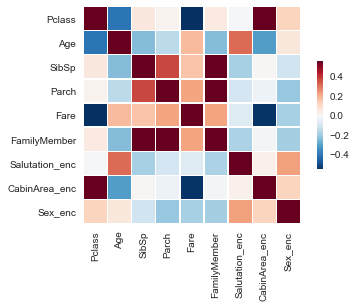

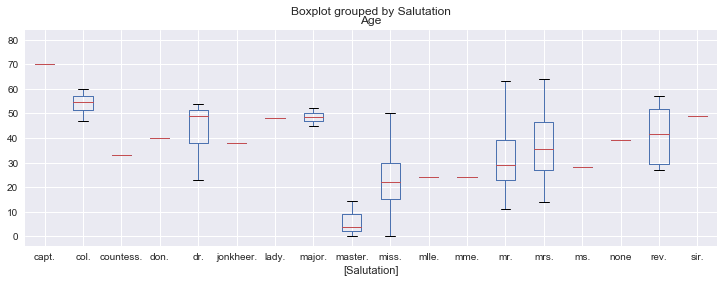

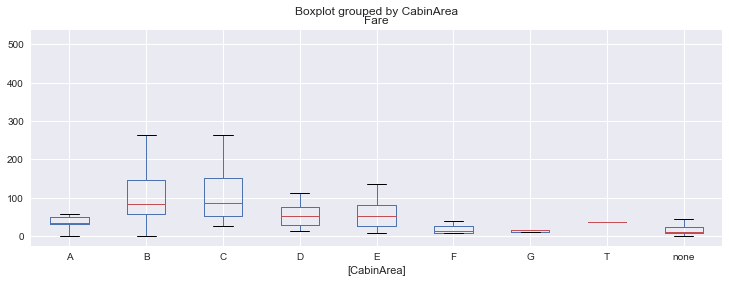

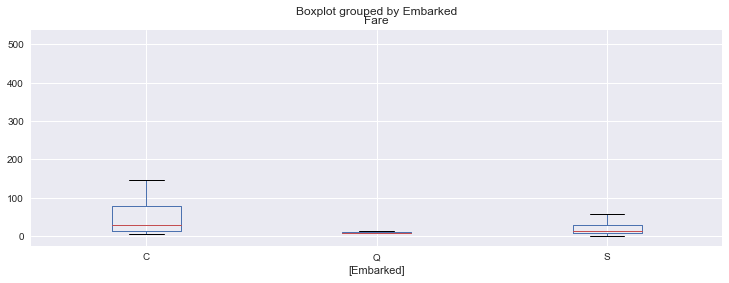

In [8]:
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(full_ds.corr(),  vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#Missing age: the most correlated field is salutation.
full_ds[["Salutation", "Age"]].boxplot(by="Salutation", figsize=(12, 4))
full_ds = impute_by_group(full_ds, "Salutation", "Age")
display(full_ds[full_ds.index.isin([6,18,20,27,29,30,32,33,37,43])])

#Missing Fare: the most correlated fields is cabin
full_ds[["CabinArea", "Fare"]].boxplot(by="CabinArea", figsize=(12, 4))
full_ds = impute_by_group(full_ds, "CabinArea", "Fare")
display(full_ds[full_ds.index.isin([1044])])

#Missing embark
full_ds[["Embarked", "Fare"]].boxplot(by="Embarked", figsize=(12, 4))
full_ds.set_value(62, 'Embarked', 'C')
full_ds.set_value(830, 'Embarked', 'C')
display(full_ds[full_ds.index.isin([62,830])])

embarked_enc = preprocessing.LabelEncoder()
embarked_enc.fit(full_ds["Embarked"])
full_ds["Embarked_enc"] = embarked_enc.transform(full_ds["Embarked"])


c:\users\ymlai\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


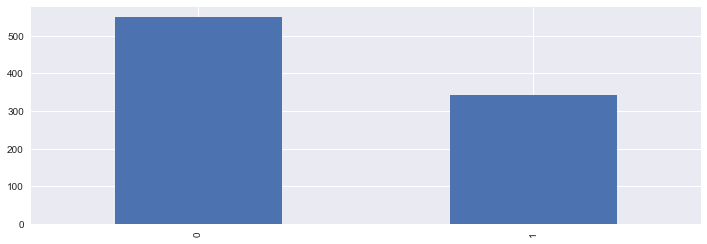

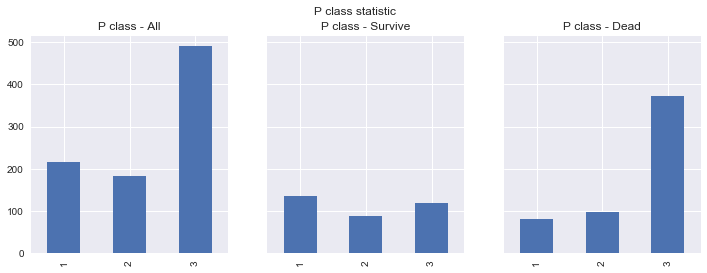

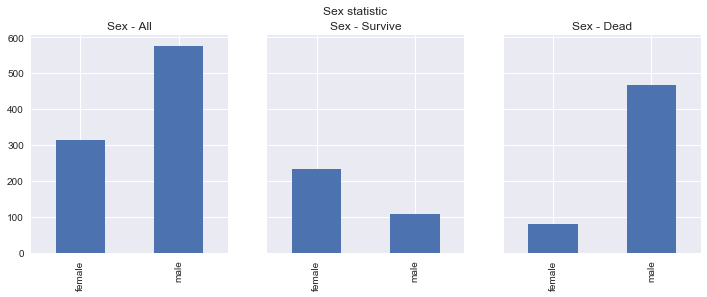

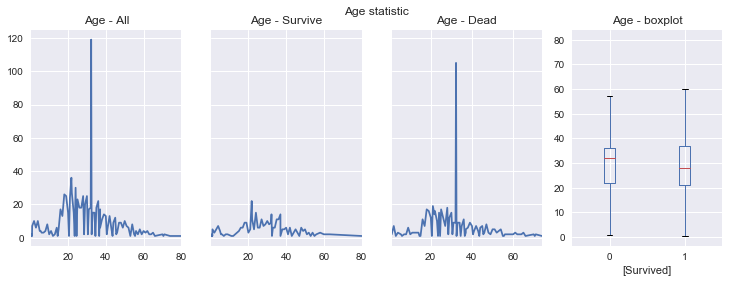

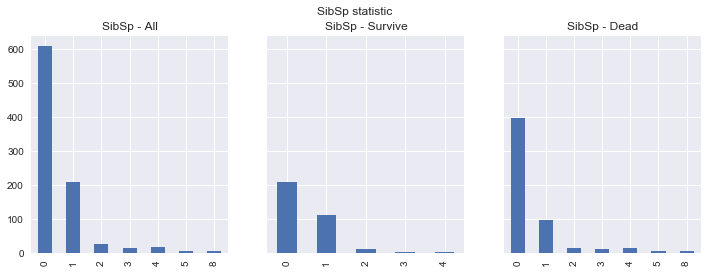

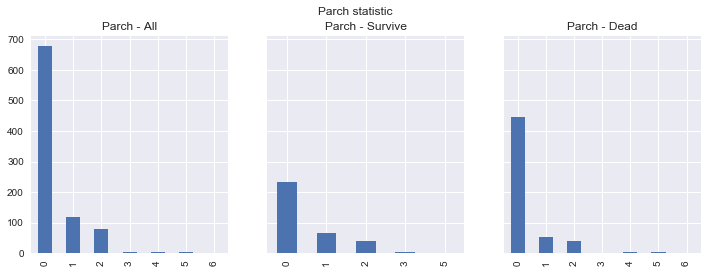

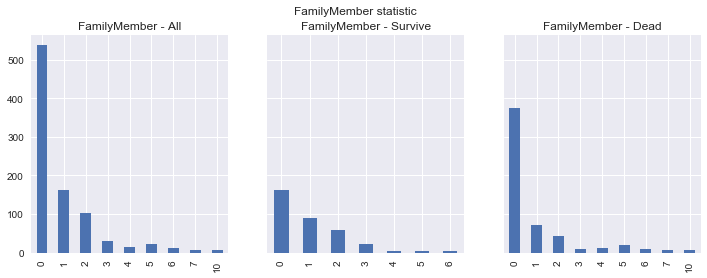

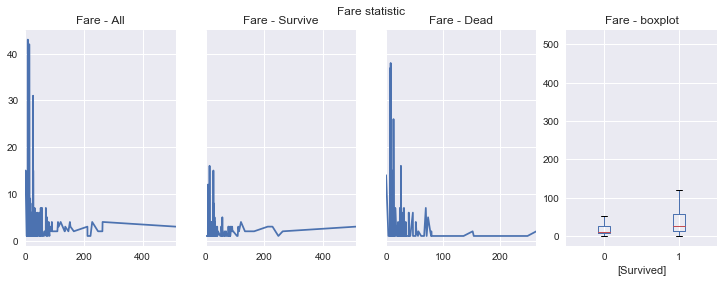

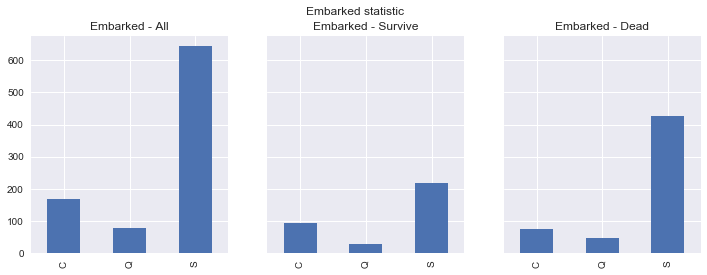

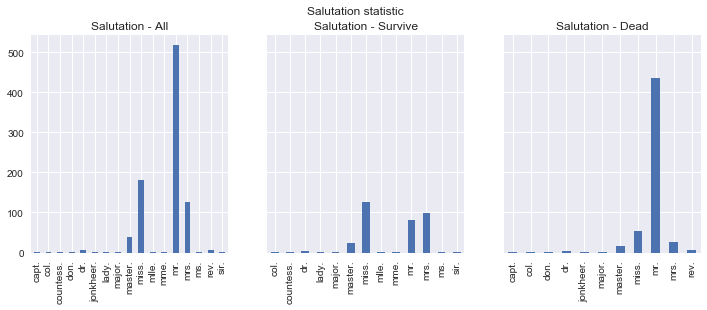

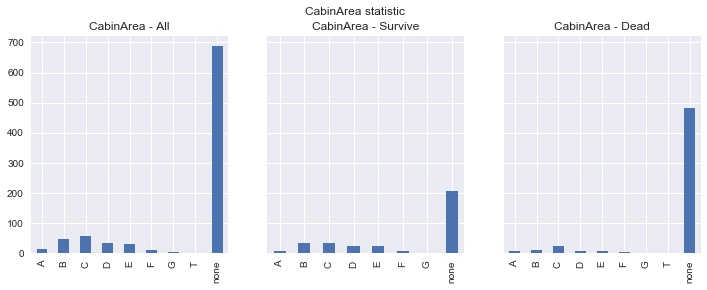

In [9]:
train_ds = get_train_ds(full_ds, train_raw)
train_ds["Survived"] = train_label

fig = plt.figure(figsize=(12,4))
train_ds["Survived"].value_counts().sort_index().plot.bar()

# Visualize data and the corresponding labels
fig = plt.figure(figsize=(12,4))

ax1 = fig.add_subplot(131)
train_ds["Pclass"].value_counts().sort_index().plot.bar()
ax1.set_title('P class - All')

ax2 = fig.add_subplot(132, sharey=ax1)
train_ds[train_ds.Survived==1]["Pclass"].value_counts().sort_index().plot.bar()
ax2.set_title('P class - Survive')

ax3 = fig.add_subplot(133, sharey=ax1)
train_ds[train_ds.Survived==0]["Pclass"].value_counts().sort_index().plot.bar()
ax3.set_title('P class - Dead')
plt.suptitle('P class statistic')

fig = plt.figure(figsize=(12,4))

ax1 = fig.add_subplot(131)
train_ds["Sex"].value_counts().sort_index().plot.bar()
ax1.set_title('Sex - All')

ax2 = fig.add_subplot(132, sharey=ax1)
train_ds[train_ds.Survived==1]["Sex"].value_counts().sort_index().plot.bar()
ax2.set_title('Sex - Survive')

ax3 = fig.add_subplot(133, sharey=ax1)
train_ds[train_ds.Survived==0]["Sex"].value_counts().sort_index().plot.bar()
ax3.set_title('Sex - Dead')
plt.suptitle('Sex statistic')

fig = plt.figure(figsize=(12,4))

ax1 = fig.add_subplot(141)
train_ds["Age"].value_counts().sort_index().plot.line()
ax1.set_title('Age - All')

ax2 = fig.add_subplot(142, sharey=ax1)
train_ds[train_ds.Survived==1]["Age"].value_counts().sort_index().plot.line()
ax2.set_title('Age - Survive')

ax3 = fig.add_subplot(143, sharey=ax1)
train_ds[train_ds.Survived==0]["Age"].value_counts().sort_index().plot.line()
ax3.set_title('Age - Dead')

ax4 = fig.add_subplot(144)
train_ds[["Age","Survived"]].boxplot(by='Survived', ax=ax4)
ax4.set_title('Age - boxplot')

plt.suptitle('Age statistic')

fig = plt.figure(figsize=(12,4))

ax1 = fig.add_subplot(131)
train_ds["SibSp"].value_counts().sort_index().plot.bar()
ax1.set_title('SibSp - All')

ax2 = fig.add_subplot(132, sharey=ax1)
train_ds[train_ds.Survived==1]["SibSp"].value_counts().sort_index().plot.bar()
ax2.set_title('SibSp - Survive')

ax3 = fig.add_subplot(133, sharey=ax1)
train_ds[train_ds.Survived==0]["SibSp"].value_counts().sort_index().plot.bar()
ax3.set_title('SibSp - Dead')

plt.suptitle('SibSp statistic')

fig = plt.figure(figsize=(12,4))

ax1 = fig.add_subplot(131)
train_ds["Parch"].value_counts().sort_index().plot.bar()
ax1.set_title('Parch - All')

ax2 = fig.add_subplot(132, sharey=ax1)
train_ds[train_ds.Survived==1]["Parch"].value_counts().sort_index().plot.bar()
ax2.set_title('Parch - Survive')

ax3 = fig.add_subplot(133, sharey=ax1)
train_ds[train_ds.Survived==0]["Parch"].value_counts().sort_index().plot.bar()
ax3.set_title('Parch - Dead')

plt.suptitle('Parch statistic')

fig = plt.figure(figsize=(12,4))

ax1 = fig.add_subplot(131)
train_ds["FamilyMember"].value_counts().sort_index().plot.bar()
ax1.set_title('FamilyMember - All')

ax2 = fig.add_subplot(132, sharey=ax1)
train_ds[train_ds.Survived==1]["FamilyMember"].value_counts().sort_index().plot.bar()
ax2.set_title('FamilyMember - Survive')

ax3 = fig.add_subplot(133, sharey=ax1)
train_ds[train_ds.Survived==0]["FamilyMember"].value_counts().sort_index().plot.bar()
ax3.set_title('FamilyMember - Dead')

plt.suptitle('FamilyMember statistic')

fig = plt.figure(figsize=(12,4))

ax1 = fig.add_subplot(141)
train_ds["Fare"].value_counts().sort_index().plot.line()
ax1.set_title('Fare - All')

ax2 = fig.add_subplot(142, sharey=ax1)
train_ds[train_ds.Survived==1]["Fare"].value_counts().sort_index().plot.line()
ax2.set_title('Fare - Survive')

ax3 = fig.add_subplot(143, sharey=ax1)
train_ds[train_ds.Survived==0]["Fare"].value_counts().sort_index().plot.line()
ax3.set_title('Fare - Dead')

ax4 = fig.add_subplot(144)
train_ds[["Fare","Survived"]].boxplot(by='Survived', ax=ax4)
ax4.set_title('Fare - boxplot')

plt.suptitle('Fare statistic')

fig = plt.figure(figsize=(12,4))

ax1 = fig.add_subplot(131)
train_ds["Embarked"].value_counts().sort_index().plot.bar()
ax1.set_title('Embarked - All')

ax2 = fig.add_subplot(132, sharey=ax1)
train_ds[train_ds.Survived==1]["Embarked"].value_counts().sort_index().plot.bar()
ax2.set_title('Embarked - Survive')

ax3 = fig.add_subplot(133, sharey=ax1)
train_ds[train_ds.Survived==0]["Embarked"].value_counts().sort_index().plot.bar()
ax3.set_title('Embarked - Dead')

plt.suptitle('Embarked statistic')

fig = plt.figure(figsize=(12,4))

ax1 = fig.add_subplot(131)
train_ds["Salutation"].value_counts().sort_index().plot.bar()
ax1.set_title('Salutation - All')

ax2 = fig.add_subplot(132, sharey=ax1)
train_ds[train_ds.Survived==1]["Salutation"].value_counts().sort_index().plot.bar()
ax2.set_title('Salutation - Survive')

ax3 = fig.add_subplot(133, sharey=ax1)
train_ds[train_ds.Survived==0]["Salutation"].value_counts().sort_index().plot.bar()
ax3.set_title('Salutation - Dead')

plt.suptitle('Salutation statistic')

fig = plt.figure(figsize=(12,4))

ax1 = fig.add_subplot(131)
train_ds["CabinArea"].value_counts().sort_index().plot.bar()
ax1.set_title('CabinArea - All')

ax2 = fig.add_subplot(132, sharey=ax1)
train_ds[train_ds.Survived==1]["CabinArea"].value_counts().sort_index().plot.bar()
ax2.set_title('CabinArea - Survive')

ax3 = fig.add_subplot(133, sharey=ax1)
train_ds[train_ds.Survived==0]["CabinArea"].value_counts().sort_index().plot.bar()
ax3.set_title('CabinArea - Dead')

plt.suptitle('CabinArea statistic')

,Survived,Pclass,Sex_enc,SibSp,Parch,FamilyMember,Embarked_enc,Salutation_enc,CabinArea_enc,Age,Fare
PassengerId,,,,,,,,,,,
648,1,1,1,0,0,0,0,1,0,56.000000,35.5000
557,1,1,0,1,0,1,0,6,0,48.000000,39.6000
446,1,1,1,0,2,2,2,8,0,4.000000,81.8583
24,1,1,1,0,0,0,2,12,0,28.000000,35.5000
97,0,1,1,0,0,0,0,12,0,71.000000,34.6542
175,0,1,1,0,0,0,0,12,0,56.000000,30.6958
186,0,1,1,0,0,0,2,12,0,32.252151,50.0000
210,1,1,1,0,0,0,0,12,0,40.000000,31.0000
285,0,1,1,0,0,0,2,12,0,32.252151,26.0000



Null value summary:
Survived          0
Pclass            0
Sex_enc           0
SibSp             0
Parch             0
FamilyMember      0
Embarked_enc      0
Salutation_enc    0
CabinArea_enc     0
Age               0
Fare              0
dtype: int64


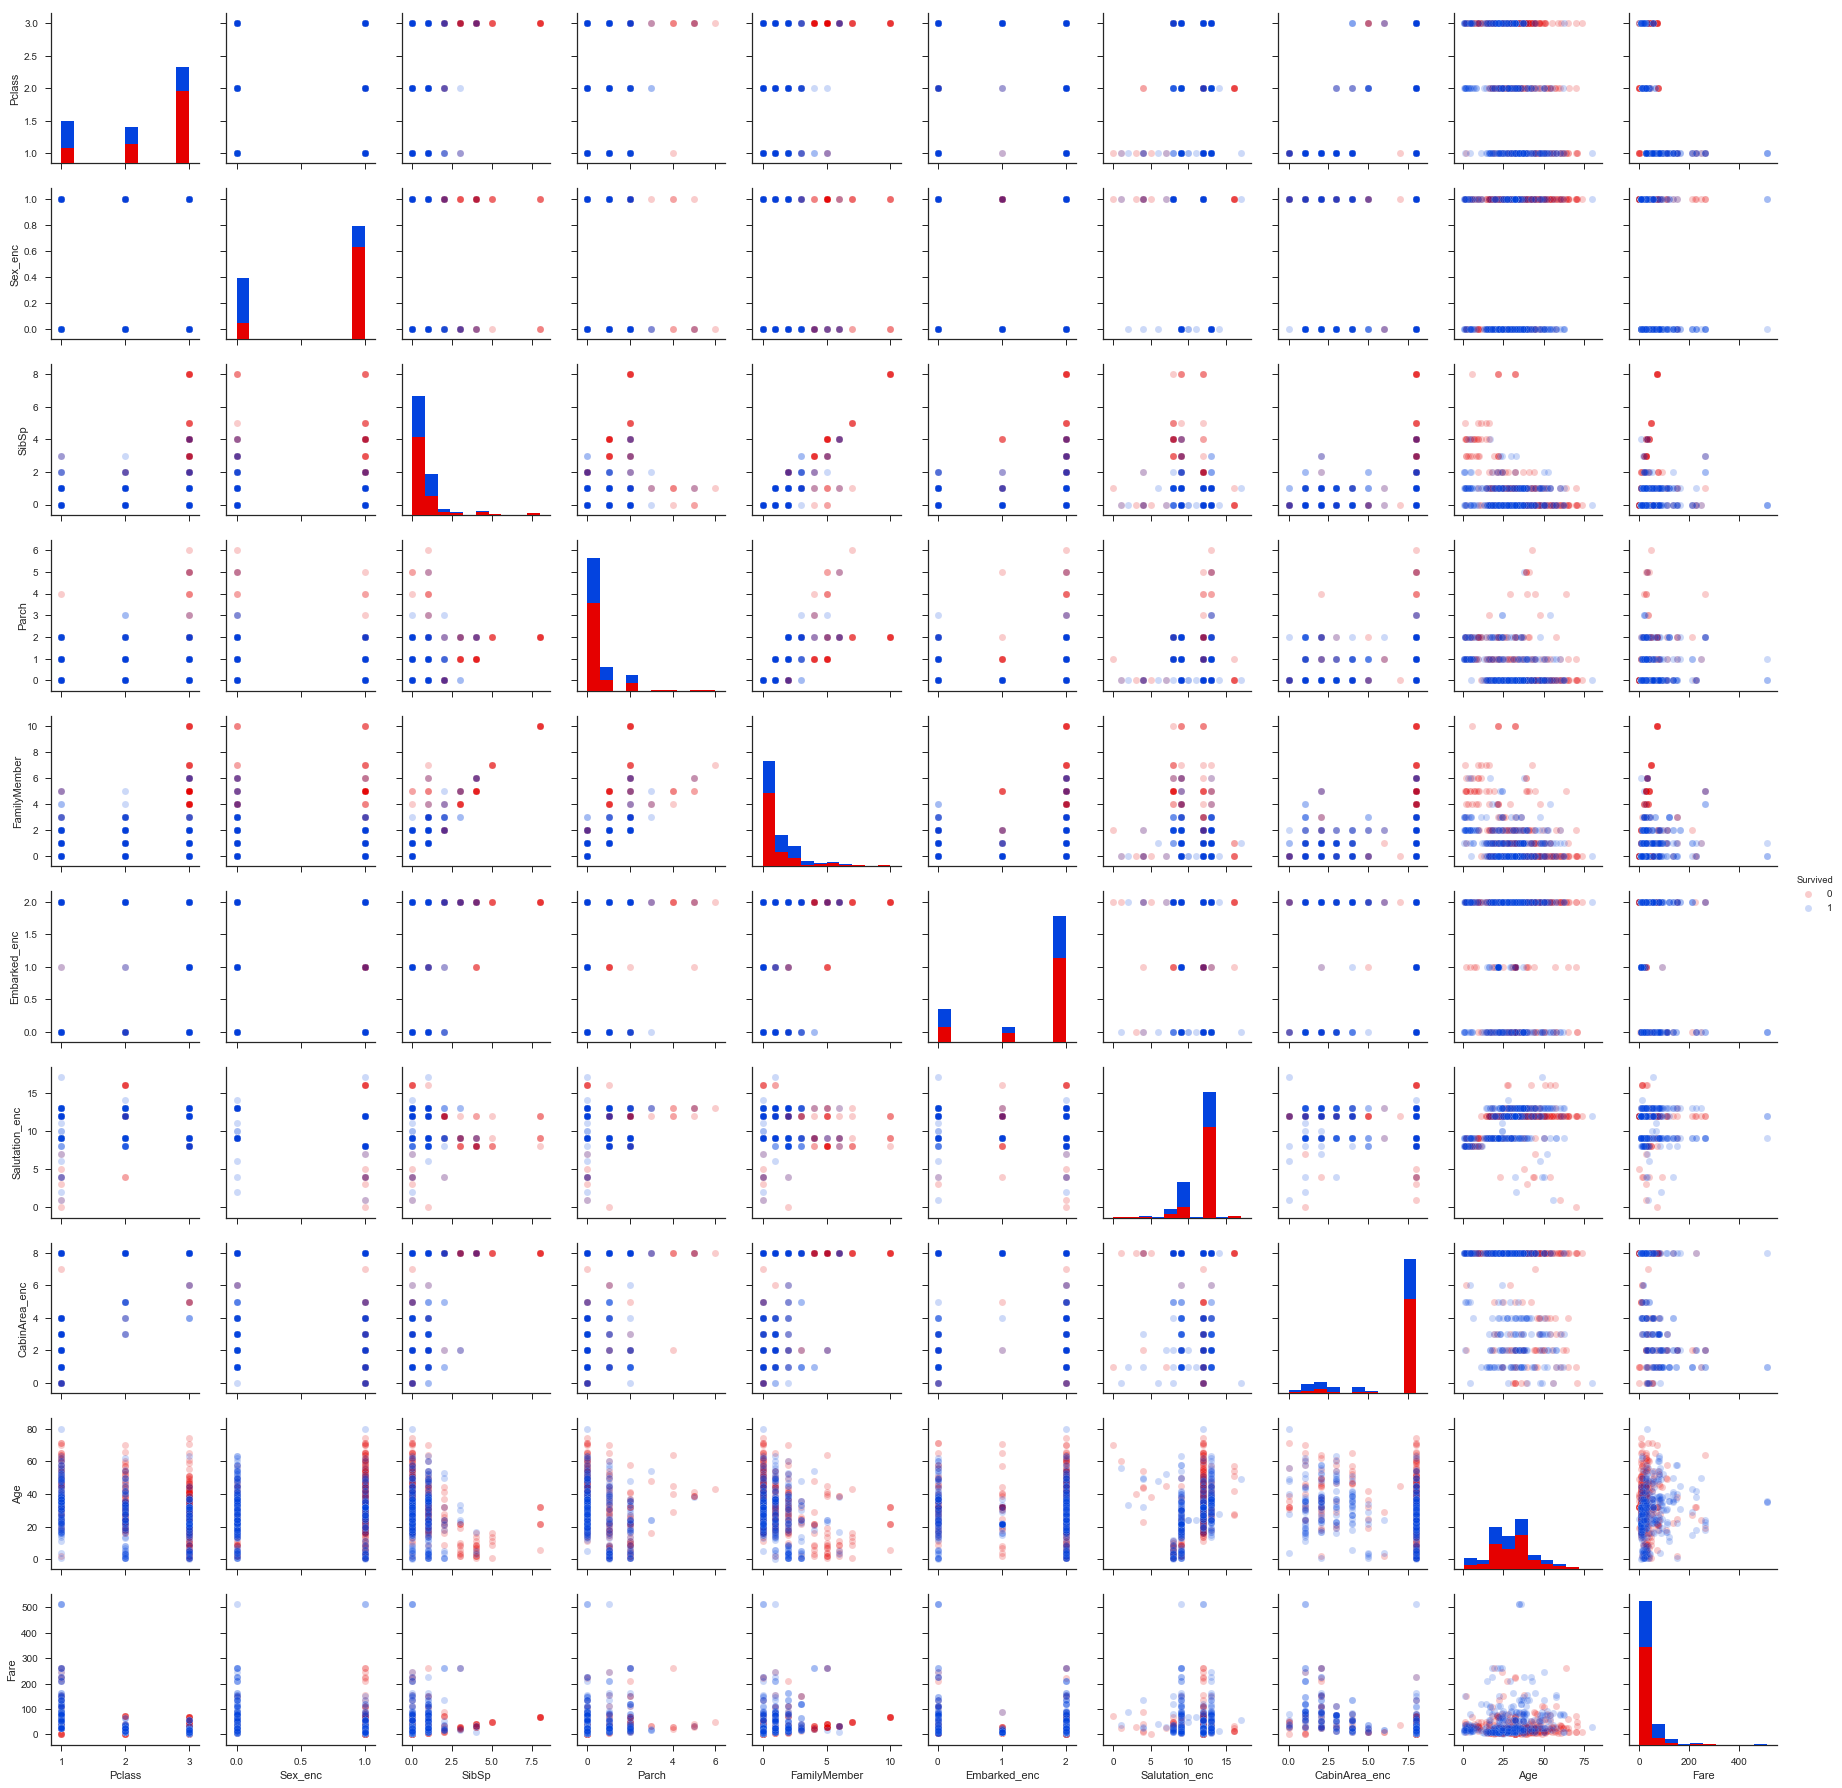

In [10]:
sns.set(style="ticks")
train_raw_pair = train_ds[["Survived", "Pclass", "Sex_enc", "SibSp", \
                        "Parch", "FamilyMember", "Embarked_enc", "Salutation_enc", "CabinArea_enc", "Age", "Fare"]]

display(train_raw_pair[0:10])

print("\nNull value summary:")
print(train_raw_pair.isnull().sum())

colors = ["red", "blue"]
sns.pairplot(train_raw_pair, hue="Survived", 
             vars=["Pclass", "Sex_enc", "SibSp", "Parch", "FamilyMember", "Embarked_enc", "Salutation_enc", "CabinArea_enc", "Age", "Fare"], 
             plot_kws=dict(alpha=.2), palette=sns.xkcd_palette(colors))

## What we have learn?
1. Female is more likely to survive
2. Class 1 is more likely to survive
3. Travelling alone is deadly
4. Having cabin is more likely to survive


In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from six.moves import cPickle as pickle

#create train and test dataset
train_dataset = get_train_ds(full_ds, train_raw)
test_dataset = get_train_ds(full_ds, test_raw)
train_dataset.sort_index(inplace=True)
test_dataset.sort_index(inplace=True)

#create train label
train_label = train_raw["Survived"]

try:
    set_filename = "train_dataset.pickle"
    with open(set_filename, 'wb') as f:
        pickle.dump(train_dataset, f, pickle.HIGHEST_PROTOCOL)
except Exception as e:
    print('Unable to save data to', set_filename, ':', e)
    
try:
    set_filename = "test_dataset.pickle"
    with open(set_filename, 'wb') as f:
        pickle.dump(test_dataset, f, pickle.HIGHEST_PROTOCOL)
except Exception as e:
    print('Unable to save data to', set_filename, ':', e)
    
try:
    set_filename = "train_label.pickle"
    with open(set_filename, 'wb') as f:
        pickle.dump(train_label, f, pickle.HIGHEST_PROTOCOL)
except Exception as e:
    print('Unable to save data to', set_filename, ':', e)

c:\users\ymlai\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
c:\users\ymlai\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [15]:
display(train_dataset[0:10])

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Salutation,CabinArea,FamilyMember,Salutation_enc,CabinArea_enc,Sex_enc,Embarked_enc
PassengerId,,,,,,,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,mr.,none,1,12,8,1,2
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,mrs.,C,1,13,2,0,0
3,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,miss.,none,0,9,8,0,2
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,mrs.,C,1,13,2,0,2
5,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,mr.,none,0,12,8,1,2
6,3,"Moran, Mr. James",male,32.252151,0,0,330877,8.4583,NaN,Q,mr.,none,0,12,8,1,1
7,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S,mr.,E,0,12,4,1,2
8,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S,master.,none,4,8,8,1,2
9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S,mrs.,none,2,13,8,0,2


## Test the quality of the dataset 

Below build a quick model and submit to Kaggle. The result is 79%

In [35]:
columns = ["Pclass", "Embarked_enc", "Salutation_enc", "CabinArea_enc"]
train_ds_onehot = train_dataset[["Pclass", "Sex_enc", "SibSp", "Parch", "Fare", "CabinArea_enc",\
                                   "Embarked_enc", "Salutation_enc", "FamilyMember"]]
train_ds_onehot = pandas.get_dummies(train_ds_onehot, sparse=True, columns=columns)
display(train_ds_onehot[0:10])

scaler = preprocessing.StandardScaler().fit(train_ds_onehot)
train_ds_onehot_scaled = scaler.transform(train_ds_onehot) 

display(pandas.DataFrame(train_ds_onehot_scaled[0:10]))

,Sex_enc,SibSp,Parch,Fare,FamilyMember,Pclass_1,Pclass_2,Pclass_3,Embarked_enc_0,Embarked_enc_1,...,Salutation_enc_17,CabinArea_enc_0,CabinArea_enc_1,CabinArea_enc_2,CabinArea_enc_3,CabinArea_enc_4,CabinArea_enc_5,CabinArea_enc_6,CabinArea_enc_7,CabinArea_enc_8
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,1,1,0,7.2500,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,1,0,71.2833,1,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,7.9250,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,1,0,53.1000,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5,1,0,0,8.0500,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
6,1,0,0,8.4583,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
7,1,0,0,51.8625,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8,1,3,1,21.0750,4,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
9,0,0,2,11.1333,2,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,0.737695,0.432793,-0.473674,-0.502445,0.059160,-0.565685,-0.510152,0.902587,-0.485576,-0.307562,...,-0.03352,-0.130856,-0.235981,-0.266296,-0.196116,-0.193009,-0.121681,-0.067153,-0.03352,0.544925
1,-1.355574,0.432793,-0.473674,0.786845,0.059160,1.767767,-0.510152,-1.107926,2.059412,-0.307562,...,-0.03352,-0.130856,-0.235981,3.755222,-0.196116,-0.193009,-0.121681,-0.067153,-0.03352,-1.835115
2,-1.355574,-0.474545,-0.473674,-0.488854,-0.560975,-0.565685,-0.510152,0.902587,-0.485576,-0.307562,...,-0.03352,-0.130856,-0.235981,-0.266296,-0.196116,-0.193009,-0.121681,-0.067153,-0.03352,0.544925
3,-1.355574,0.432793,-0.473674,0.420730,0.059160,1.767767,-0.510152,-1.107926,-0.485576,-0.307562,...,-0.03352,-0.130856,-0.235981,3.755222,-0.196116,-0.193009,-0.121681,-0.067153,-0.03352,-1.835115
4,0.737695,-0.474545,-0.473674,-0.486337,-0.560975,-0.565685,-0.510152,0.902587,-0.485576,-0.307562,...,-0.03352,-0.130856,-0.235981,-0.266296,-0.196116,-0.193009,-0.121681,-0.067153,-0.03352,0.544925
5,0.737695,-0.474545,-0.473674,-0.478116,-0.560975,-0.565685,-0.510152,0.902587,-0.485576,3.251373,...,-0.03352,-0.130856,-0.235981,-0.266296,-0.196116,-0.193009,-0.121681,-0.067153,-0.03352,0.544925
6,0.737695,-0.474545,-0.473674,0.395814,-0.560975,1.767767,-0.510152,-1.107926,-0.485576,-0.307562,...,-0.03352,-0.130856,-0.235981,-0.266296,-0.196116,5.181095,-0.121681,-0.067153,-0.03352,-1.835115
7,0.737695,2.247470,0.767630,-0.224083,1.919564,-0.565685,-0.510152,0.902587,-0.485576,-0.307562,...,-0.03352,-0.130856,-0.235981,-0.266296,-0.196116,-0.193009,-0.121681,-0.067153,-0.03352,0.544925
8,-1.355574,-0.474545,2.008933,-0.424256,0.679295,-0.565685,-0.510152,0.902587,-0.485576,-0.307562,...,-0.03352,-0.130856,-0.235981,-0.266296,-0.196116,-0.193009,-0.121681,-0.067153,-0.03352,0.544925
9,-1.355574,0.432793,-0.473674,-0.042956,0.059160,-0.565685,1.960202,-1.107926,2.059412,-0.307562,...,-0.03352,-0.130856,-0.235981,-0.266296,-0.196116,-0.193009,-0.121681,-0.067153,-0.03352,0.544925


In [27]:
def transform_ds_to_input(dataset):
    columns = ["Pclass", "Embarked_enc", "Salutation_enc", "CabinArea_enc"]
    ds_onehot = dataset[["Pclass", "Sex_enc", "SibSp", "Parch", "Fare", "CabinArea_enc",\
                                       "Embarked_enc", "Salutation_enc", "FamilyMember"]]
    ds_onehot = pandas.get_dummies(ds_onehot, sparse=True, columns=columns)
    scaler = preprocessing.StandardScaler().fit(ds_onehot)
    ds_onehot_scaled = scaler.transform(ds_onehot) 
    return ds_onehot_scaled

train_ds_onehot_scaled = transform_ds_to_input(train_dataset)
test_ds_onehot_scaled = transform_ds_to_input(test_dataset)

In [29]:
seed = 10
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(train_ds_onehot_scaled, train_label, test_size=test_size)

#clf = RandomForestClassifier(n_estimators=5, max_features=3, max_depth=3, min_samples_split=2, random_state=0)
clf = RandomForestClassifier()     
clf.fit(X_train, y_train)

# make predictions for test data
y_pred = clf.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 79.85%


In [ ]:
r_pred = clf.predict(test_dataset)
r_predictions = [int(round(value)) for value in r_pred]

submission_df = pandas.DataFrame(index=test_dataset.index, columns=["Survived"])
submission_df["Survived"] = r_predictions
submission_df.to_csv("submission_rf.csv", sep=',')

## Visualizing the data usng t-SNE

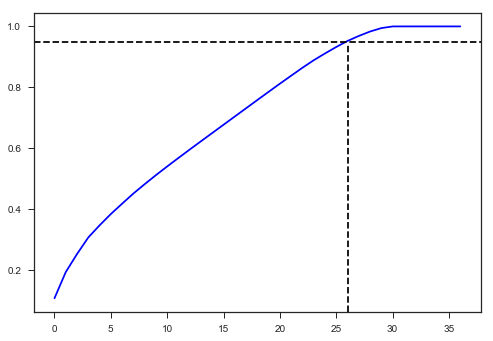

In [32]:
from sklearn.decomposition import PCA
#study pca 

pca = PCA()
pca.fit(train_ds_onehot_scaled)
cumsum = np.cumsum(pca.explained_variance_ratio_)

plt.plot([i for i in range(len(cumsum))],cumsum,'b-')
plt.axhline(y=0.95, xmin=0, xmax=1, hold=None, c='k', linestyle='--')
plt.axvline(x=26, ymin=0, ymax=0.9, hold=None, c='k', linestyle='--')

In [33]:
import sklearn.manifold

pca = PCA(n_components=26)
train_ds_reduce = pca.fit_transform(train_ds_onehot_scaled)

tsne = sklearn.manifold.TSNE()
train_tsne = pandas.DataFrame(tsne.fit_transform(train_ds_reduce))
train_tsne["Survived"] = train_label

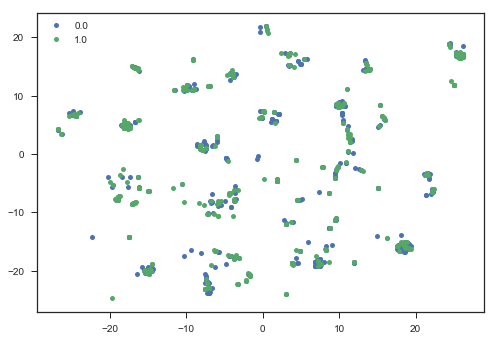

In [34]:
groups = train_tsne.groupby('Survived')

# Plot
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group[0], group[1], marker='o', linestyle='', ms=5, label=name)
ax.legend()

plt.show()